# Data loading, storage, and file formats

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [2]:
%pwd

u'/Users/mihanlg/GITHUB/sphere/analysis/Lect4/pydata-book-master'

## Reading and Writing Data in Text Format

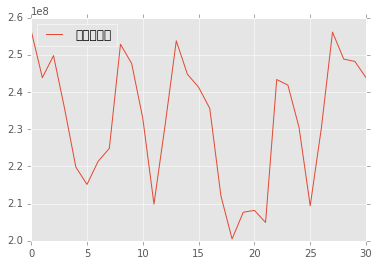

In [37]:
%matplotlib inline
import matplotlib
import pandas as pd

df = pd.read_csv('http://www.liveinternet.ru/stat/ru/searches.csv?id=total;graph=csv', sep = ';')
df[df['всего'] > 208000000]
matplotlib.style.use('ggplot')
df.plot()

In [3]:
!cat ch06/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [4]:
df = pd.read_csv('ch06/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
pd.read_table('ch06/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
!cat ch06/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [7]:
pd.read_csv('ch06/ex2.csv', header=None)
pd.read_csv('ch06/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('ch06/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [ ]:
!cat ch06/csv_mindex.csv
parsed = pd.read_csv('ch06/csv_mindex.csv', index_col=['key1', 'key2'])
parsed

In [ ]:
list(open('ch06/ex3.txt'))

In [ ]:
result = pd.read_table('ch06/ex3.txt', sep='\s+')
result

In [ ]:
!cat ch06/ex4.csv
pd.read_csv('ch06/ex4.csv', skiprows=[0, 2, 3])

In [ ]:
!cat ch06/ex5.csv
result = pd.read_csv('ch06/ex5.csv')
result
pd.isnull(result)

In [ ]:
result = pd.read_csv('ch06/ex5.csv', na_values=['NULL'])
result

In [ ]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('ch06/ex5.csv', na_values=sentinels)

### Reading text files in pieces

In [ ]:
result = pd.read_csv('ch06/ex6.csv')
result

In [ ]:
pd.read_csv('ch06/ex6.csv', nrows=5)

In [ ]:
chunker = pd.read_csv('ch06/ex6.csv', chunksize=1000)
chunker

In [ ]:
chunker = pd.read_csv('ch06/ex6.csv', chunksize=1000)

tot = Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.order(ascending=False)

In [ ]:
tot[:10]

### Writing data out to text format

In [ ]:
data = pd.read_csv('ch06/ex5.csv')
data

In [ ]:
data.to_csv('ch06/out.csv')
!cat ch06/out.csv

In [ ]:
data.to_csv(sys.stdout, sep='|')

In [ ]:
data.to_csv(sys.stdout, na_rep='NULL')

In [ ]:
data.to_csv(sys.stdout, index=False, header=False)

In [ ]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

In [ ]:
dates = pd.date_range('1/1/2000', periods=7)
ts = Series(np.arange(7), index=dates)
ts.to_csv('ch06/tseries.csv')
!cat ch06/tseries.csv

In [ ]:
Series.from_csv('ch06/tseries.csv', parse_dates=True)

### Manually working with delimited formats

In [ ]:
!cat ch06/ex7.csv

In [ ]:
import csv
f = open('ch06/ex7.csv')

reader = csv.reader(f)

In [ ]:
for line in reader:
    print(line)

In [ ]:
lines = list(csv.reader(open('ch06/ex7.csv')))
header, values = lines[0], lines[1:]
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

In [ ]:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

In [ ]:
with open('mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect=my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

In [ ]:
%cat mydata.csv

### JSON data

In [22]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 25, "pet": "Zuko"},
              {"name": "Katie", "age": 33, "pet": "Cisco"}]
}
"""

In [23]:
import json
result = json.loads(obj)
result

{u'name': u'Wes',
 u'pet': None,
 u'places_lived': [u'United States', u'Spain', u'Germany'],
 u'siblings': [{u'age': 25, u'name': u'Scott', u'pet': u'Zuko'},
  {u'age': 33, u'name': u'Katie', u'pet': u'Cisco'}]}

In [ ]:
asjson = json.dumps(result)

In [ ]:
siblings = DataFrame(result['siblings'], columns=['name', 'age'])
siblings

### XML and HTML, Web scraping

**NB. The Yahoo! Finance API has changed and this example no longer works**

In [ ]:
from lxml.html import parse
from urllib2 import urlopen

parsed = parse(urlopen('http://finance.yahoo.com/q/op?s=AAPL+Options'))

doc = parsed.getroot()

In [ ]:
links = doc.findall('.//a')
links[15:20]

In [ ]:
lnk = links[28]
lnk
lnk.get('href')
lnk.text_content()

In [ ]:
urls = [lnk.get('href') for lnk in doc.findall('.//a')]
urls[-10:]

In [ ]:
tables = doc.findall('.//table')
calls = tables[9]
puts = tables[13]

In [ ]:
rows = calls.findall('.//tr')

In [ ]:
def _unpack(row, kind='td'):
    elts = row.findall('.//%s' % kind)
    return [val.text_content() for val in elts]

In [ ]:
_unpack(rows[0], kind='th')
_unpack(rows[1], kind='td')

In [ ]:
from pandas.io.parsers import TextParser

def parse_options_data(table):
    rows = table.findall('.//tr')
    header = _unpack(rows[0], kind='th')
    data = [_unpack(r) for r in rows[1:]]
    return TextParser(data, names=header).get_chunk()

In [ ]:
call_data = parse_options_data(calls)
put_data = parse_options_data(puts)
call_data[:10]

#### Parsing XML with lxml.objectify

In [ ]:
%cd ch06/mta_perf/Performance_XML_Data

In [ ]:
!head -21 Performance_MNR.xml

In [ ]:
from lxml import objectify

path = 'Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [ ]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [ ]:
perf = DataFrame(data)
perf

In [ ]:
root

In [ ]:
root.get('href')

In [ ]:
root.text

## Binary data formats

In [ ]:
cd ../..

In [ ]:
frame = pd.read_csv('ch06/ex1.csv')
frame
frame.to_pickle('ch06/frame_pickle')

In [ ]:
pd.read_pickle('ch06/frame_pickle')

### Using HDF5 format

In [ ]:
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

In [ ]:
store['obj1']

In [ ]:
store.close()
os.remove('mydata.h5')

### Interacting with HTML and Web APIs

In [ ]:
import requests
url = 'https://api.github.com/repos/pydata/pandas/milestones/28/labels'
resp = requests.get(url)
resp

In [ ]:
data[:5]

In [ ]:
issue_labels = DataFrame(data)
issue_labels

## Interacting with databases

In [ ]:
import sqlite3

query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""

con = sqlite3.connect(':memory:')
con.execute(query)
con.commit()

In [ ]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

In [ ]:
cursor.description

In [ ]:
DataFrame(rows, columns=zip(*cursor.description)[0])

In [ ]:
import pandas.io.sql as sql
sql.read_sql('select * from test', con)